# Textmining Memo

텍스트 내의 패턴, 트렌드 → high quality information

unstructured data → structured (숫자=일정한 길이의 vector)

⇒ 변환된 vector에 머신러닝/딥러닝 기법

- 예시

1) text classifcation (=sentimentt analysis)

2) clustering

3) summarization

4) Q&A

5) translation

6) Keyword extraction

7) prediction (=regression)

8) Topic modeling (LSA, LDA)

- 요구지식

1) 통계학, 선형대수

2) NLP (natural language processing=자연어처리)

3) 머신러닝 (회귀분석, 나이브베이즈, decision tree)

4) 딥러닝 (CNN, RNN)

## 1. 텍스트마이닝 단계

1) Document 

⇒ tokenize (단어 단위로 쪼개는) / normalize (원형으로 만들어줌)

2) Sequence normalized words (리스트, 순서가 있는)

 ex) ['I', 'have', 'a', 'pencil']

3) Naive Bayes / Decision Tree, SVM / Logistic Regression, MLP / RNN

## 2. 텍스트마이닝 도구

1) NLTK : 가장 많이 알려진 NLP 라이브러리

2) Scikit Learn : 머신러닝 라이브러리

3) Gensim : Word2Vec

4) Keras : 딥러닝 위주 라이브러리 (RNN)

5) PyTorch : 요새 핫함

## 3. NLP 도구

목적 : document를 sparse vector (fixed) 로 변환 → 머신러닝 가능

- Tokenize : 최소단위로 쪼갬

    Document → Sentence → Word → 의미 없는 문자 filtering

- Normalization : 표준화

    Stemming : 단수-복수, 현재형-미래형 규칙에 의거해서 변환

     - 문제점 : 이상한 단어로 변환되기도 함 (but, 통일은 잘 됨)

    2) Lemmatization : 사전을 이용한 원형 추출 (WordNet)

     - 더 정확하지

- POS-tagging : 품사 부착

    = 형태소 분석 (or 품사태깅)

- Chunking : 명사구, 형용사구, 분사구 등 말모듬으로

    → Information extraction (위치정보, 기관이름)

- Named Entity Recognition (개체명 인식)

    ex) James is working at Disney in London

     → Person, Organization, Location

     관계인식 (Relation extraction) = 디즈니는 런던에 있다 (챗봇)

### BOW (Bag of Words)

- BOW (Bag of Words) = fixed length → vector
- Vector Space Model

    어떤 단어의 유무(1/0)중요할 뿐, 순서 위치 x

    ⇒ 시퀀스로 안본다

- Count Vector

    단어가 나타나느 횟수로 표현

    - 문제점 : the, a와 같은 중요성 떨어지는 단어

    ⇒ TDIF (가중치 변화) ex) 문서 빈도로 나눠줌

⇒ Similarity matching / Classify

유사도 계산 (내적, Cosine Similarity)

In [7]:
from IPython.display import Image 

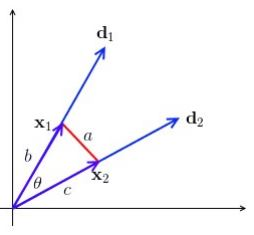

In [11]:
Image("D:/img/cosinesimilarity.JPG")

### Naive Bayes

스팸, 스팸 아닌 것 구분

스팸일 확률 | 스팸메일일 때 단어나올 확률

### Logistic Regression

독립변수가 만개인 다중회귀분석?

1) 만개보다는 traning set이 많아야한다

2) 과적합이 발생하기 쉽다

→ Ridge : L2 norm (규제항) 추가

→ Lasso : 영향을 미치지 않는 단어 제외 (feature selection)

## 4. 텍스트마이닝의 문제

Extremely sparse data = 차원의 저주

- 단어의 불균형

    극히 소수의 데이터가 영향

    → 해결방안 ; feature selection (빈도 높은 단어 삭제 = 최대 50%)

    → 해결방안 ; Boolean BOW (단어의 유무로만 변환)

- 단어 순서정보의 손실 (BOW)

    문맥 (context) 상실

    특히 번역 ; sequence to sequence

    → 해결방안 ; n-gram, Deep learning (RNN, Attention, Transformer, BERT)

### 문제해결방안

#### Dimensionality Reduction

차원 축소 

- Feature selection (만개 중 필요없는거 삭제)

     → Manual (직접), Lasso (Regularization)

- Feature extraction (만개 중 필요한 것만)

    PCA - Principal Component Analysis (주성분 분석)

    2차원 → 1차원 (분산이 최대가 되게=정보 손실 최소화)

    LSA - Latent Semantic Analysis

    Topic modeling

    Latent Dirichlet Allocation

3) Embedding : 학습을 통해 단어 압축

4) Deep learning : RBM

#### Word Embedding

: 단어에 대한 vector의 차원 축소가 목표

one-hot-encoding = 하나만 1인 형태로 (더미변수)

문서→ 2차원 행렬

or 긴 벡터 → 딥러닝 (RNN, CNN, BERT)

#### Word2Vec

1) CBOW : weight로 임베딩

2) Skip-Ngram : 한 단어 주변 단어들을 예측

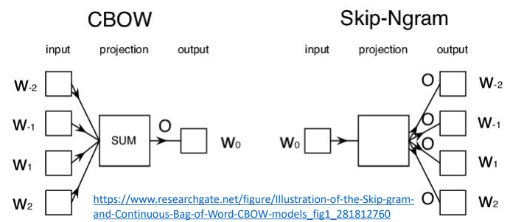

In [12]:
Image("D:/img/skip ngram.JPG")

ELMO↔ Word2Vec, GloVe = fixed embedding

: 같이 쓰인 단어들의 문맥 반영

biLSTM

Document Embedding

: fixed + dense

Word2Vec 모형 base

RBM (Restricted Boltzmann Machine)

: 차원의 저주를 줄이는 방법

잘 안쓰이는데 딥러닝의 문을 열어준 기법

Hinton에 의해 제안

원래의 정보량 최대한 유지

### Context(sequence)의 파악

1) N-gram

 : 대상이 되는 문자열을 하나의 단어가 아닌 두개 이상의 단위로 잘라서 처리

Unigram + Bigram = BOW

→ 너무 경우의 수가 많아지는 단점

2) 딥러닝 - RNN (순서 감지 네트워크)

: 단어들의 sequence로 처리

embedding 된 word들을 순서대로 나열

문제점 = 긴 문장 (layer가 많아짐) → 경사손실문제 (Vanishing gradient) :  앞선 단어들의 영향력 약해짐

3) LSTM (Long Short Term Memory)

: 가까운 단어들만 학습되는걸 막기 위해 직통 통로 만들어!

3-2) Bi-LSTM

: 양방향으로 LSTM을 구성

4) CNN (Convolutional Neural Networks)

: 원래 이미지 처리를 위한 신경망

주변 정보 학습한다는 점에서 문맥학습 성능 Good

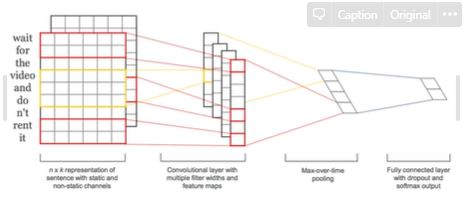

In [13]:
Image("D:/img/cnn.JPG")

#### Sequence to Sequence

번역을 위해 만들어짐, 챗봇, 요약도 가능

ex) 영어문장 (sequence) → 독일어 (sequence)

원래 입력은 sequence, 출력은 하나의 node

→ encoder, decoder의 구조를 가진다

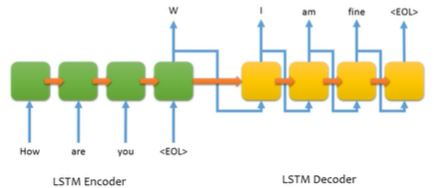

In [15]:
Image("D:/img/sequence2sequence.JPG")

#### Attention

출력에 나온 단어는 입력의 특정 단어에 민감하다는 idea

영향을 가장 많이 주는 = attention이 높다 (확률)

Context vector + attention  값

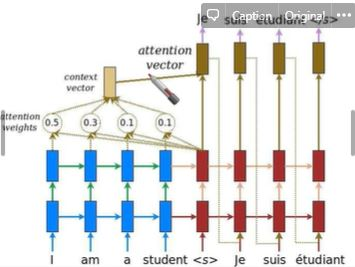

In [16]:
Image("D:/img/attention.JPG")

#### Transformer (self-attention)

입력 단어들끼리도 상호연관성이 있다는 idea

입력 → 출력 attention + 입력 단어 간의 attention + 입력+출력 → 출력 attention

#### BERT (Bidirectional Encoder Representations form Transformer)

양방향 transformer 인코더

feature + model을 함께 transfer → fine tuning에 적용

segment, position, embedding을 사용